# 대전시 CCTV 현황

In [1]:
import numpy as np
import pandas as pd

import xlrd, openpyxl
import csv

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
cctv_ddg = pd.read_csv( '대전광역시_대덕구_CCTV_20190331.csv', encoding = 'CP949' )
cctv_ddg.head()

관리기관명                 소재지도로명주소               소재지지번주소 설치목적구분  카메라대수  \
0  대전광역시 대덕구청    대전광역시 대덕구 비래서로61번길 35   대전광역시 대덕구 비래동 138-4   생활방범      1   
1  대전광역시 대덕구청  대전광역시 대덕구 옛신탄진로151번길 11  대전광역시 대덕구 오정동 435-14   생활방범      1   
2  대전광역시 대덕구청   대전광역시 대덕구 대전로1066번길 35  대전광역시 대덕구 오정동 441-12   생활방범      2   
3  대전광역시 대덕구청    대전광역시 대덕구 중리남로27번길 11   대전광역시 대덕구 중리동 195-1   생활방범      1   
4  대전광역시 대덕구청        대전광역시 대덕구 중리남로 45   대전광역시 대덕구 중리동 207-2   생활방범      1   

   카메라화소수 촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
0     240    NaN  30.0  2008-08  042-608-6097  36.355991  127.452253   
1     240    NaN  30.0  2008-08  042-608-6097  36.352678  127.417440   
2     240    NaN  30.0  2018-08  042-608-6097  36.350281  127.417418   
3     240    NaN  30.0  2008-08  042-608-6097  36.360539  127.428727   
4     240    NaN  30.0  2008-08  042-608-6097  36.360795  127.426761   

      데이터기준일자  
0  2019-03-31  
1  2019-03-31  
2  2019-03-31  
3  2019-03-31  
4  2019-03-31

In [4]:
cctv_ddg = cctv_ddg.rename( columns = { '관리기관명' : '구별' } )
cctv_ddg.iloc[ : , 0 ] = '대덕구'
cctv_ddg.head()

구별                 소재지도로명주소               소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  대덕구    대전광역시 대덕구 비래서로61번길 35   대전광역시 대덕구 비래동 138-4   생활방범      1     240   
1  대덕구  대전광역시 대덕구 옛신탄진로151번길 11  대전광역시 대덕구 오정동 435-14   생활방범      1     240   
2  대덕구   대전광역시 대덕구 대전로1066번길 35  대전광역시 대덕구 오정동 441-12   생활방범      2     240   
3  대덕구    대전광역시 대덕구 중리남로27번길 11   대전광역시 대덕구 중리동 195-1   생활방범      1     240   
4  대덕구        대전광역시 대덕구 중리남로 45   대전광역시 대덕구 중리동 207-2   생활방범      1     240   

  촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0    NaN  30.0  2008-08  042-608-6097  36.355991  127.452253  2019-03-31  
1    NaN  30.0  2008-08  042-608-6097  36.352678  127.417440  2019-03-31  
2    NaN  30.0  2018-08  042-608-6097  36.350281  127.417418  2019-03-31  
3    NaN  30.0  2008-08  042-608-6097  36.360539  127.428727  2019-03-31  
4    NaN  30.0  2008-08  042-608-6097  36.360795  127.426761  2019-03-31

In [5]:
cctv_ddg.count() #NaN여부확인

구별          742
소재지도로명주소    742
소재지지번주소     742
설치목적구분      742
카메라대수       742
카메라화소수      742
촬영방면정보       20
보관일수        730
설치년월        742
관리기관전화번호    742
위도          742
경도          742
데이터기준일자     742
dtype: int64

In [6]:
cctv_ddg.columns

del cctv_ddg[ '소재지도로명주소' ]; del cctv_ddg[ '소재지지번주소' ]; del cctv_ddg[ '카메라화소수' ]; del cctv_ddg[ '촬영방면정보' ] 
del cctv_ddg[ '보관일수' ]; del cctv_ddg[ '설치년월' ]; del cctv_ddg[ '관리기관전화번호' ]; del cctv_ddg[ '데이터기준일자' ]

In [7]:
cctv_ddg.describe()

카메라대수          위도          경도
count  742.000000  742.000000  742.000000
mean     1.234501   36.389936  127.428092
std      0.618209    0.040214    0.013605
min      1.000000   36.328581  127.378326
25%      1.000000   36.359491  127.419690
50%      1.000000   36.366147  127.426253
75%      1.000000   36.438028  127.435410
max      6.000000   36.634928  127.475832

In [8]:
cctv_ddg_c = cctv_ddg[ '카메라대수' ].sum()
cctv_ddg_c

916

In [9]:
cctv_dg = pd.read_csv( '대전광역시_동구_CCTV_20190321.csv', encoding = 'CP949' )
cctv_dg.head()

관리기관명                     소재지도로명주소 소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  대전광역시 동구   대전광역시 동구  계족로446번길 19(용전동)     NaN   생활방범      1     200   
1  대전광역시 동구        대전광역시 동구 계족로 459(용전동)     NaN   생활방범      1     200   
2  대전광역시 동구  대전광역시 동구 동서대로1678번길 38(성남동)     NaN   생활방범      1     200   
3  대전광역시 동구      대전광역시 동구 한남로7번길 22(홍도동)     NaN   생활방범      1     200   
4  대전광역시 동구        대전광역시 동구 태전로 146(삼성동)     NaN   생활방범      1     200   

   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0     NaN    30  2008-08  042-251-4173  36.351339  127.433575  2019-03-21  
1     NaN    30  2008-08  042-251-4173  36.352627  127.431277  2019-03-21  
2     NaN    30  2008-08  042-251-4173  36.347003  127.436489  2019-03-21  
3     NaN    30  2008-08  042-251-4173  36.350232  127.427749  2019-03-21  
4     NaN    30  2008-08  042-251-4173  36.340992  127.420782  2019-03-21

In [10]:
cctv_dg = cctv_dg.rename( columns = { '관리기관명' : '구별' } )
cctv_dg.iloc[ : , 0 ] = '동구'
cctv_dg.head()

구별                     소재지도로명주소 소재지지번주소 설치목적구분  카메라대수  카메라화소수  촬영방면정보  \
0  동구   대전광역시 동구  계족로446번길 19(용전동)     NaN   생활방범      1     200     NaN   
1  동구        대전광역시 동구 계족로 459(용전동)     NaN   생활방범      1     200     NaN   
2  동구  대전광역시 동구 동서대로1678번길 38(성남동)     NaN   생활방범      1     200     NaN   
3  동구      대전광역시 동구 한남로7번길 22(홍도동)     NaN   생활방범      1     200     NaN   
4  동구        대전광역시 동구 태전로 146(삼성동)     NaN   생활방범      1     200     NaN   

   보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0    30  2008-08  042-251-4173  36.351339  127.433575  2019-03-21  
1    30  2008-08  042-251-4173  36.352627  127.431277  2019-03-21  
2    30  2008-08  042-251-4173  36.347003  127.436489  2019-03-21  
3    30  2008-08  042-251-4173  36.350232  127.427749  2019-03-21  
4    30  2008-08  042-251-4173  36.340992  127.420782  2019-03-21

In [11]:
cctv_dg.count()

구별          466
소재지도로명주소    341
소재지지번주소     125
설치목적구분      466
카메라대수       466
카메라화소수      466
촬영방면정보        0
보관일수        466
설치년월        466
관리기관전화번호    466
위도          466
경도          466
데이터기준일자     466
dtype: int64

In [12]:
cctv_dg.columns

del cctv_dg[ '소재지도로명주소' ]; del cctv_dg[ '소재지지번주소' ]; del cctv_dg[ '카메라화소수' ]; del cctv_dg[ '촬영방면정보' ] 
del cctv_dg[ '보관일수' ]; del cctv_dg[ '설치년월' ]; del cctv_dg[ '관리기관전화번호' ]; del cctv_dg[ '데이터기준일자' ]

In [13]:
cctv_dg.describe()

카메라대수          위도          경도
count  466.000000  466.000000  466.000000
mean     1.538627   36.331589  127.449645
std      0.889369    0.025192    0.017488
min      1.000000   36.219349  127.414422
25%      1.000000   36.322745  127.437921
50%      1.000000   36.334992  127.448185
75%      2.000000   36.346131  127.459231
max      5.000000   36.417952  127.530930

In [14]:
cctv_dg_c = cctv_dg[ '카메라대수' ].sum()
cctv_dg_c

717

In [15]:
cctv_sg = pd.read_csv( '대전광역시_서구_CCTV_20190705.csv', encoding = 'CP949' )
cctv_sg.head()

관리기관명                     소재지도로명주소              소재지지번주소 설치목적구분  카메라대수  \
0  대전광역시 서구청  대전광역시 서구 신갈마로 209번길 65(갈마동)   대전광역시 서구 갈마동 301-1   생활방범      1   
1  대전광역시 서구청   대전광역시 서구 계룡로 416번길 28(갈마동)  대전광역시 서구 갈마동 344-21   생활방범      1   
2  대전광역시 서구청      대전광역시 서구 관저중로 94번길(관저동)    대전광역시 서구 관저동 1016   생활방범      1   
3  대전광역시 서구청    대전광역시 서구 도솔로 388번길 8(괴정동)  대전광역시 서구 괴정동 423-21   생활방범      2   
4  대전광역시 서구청    대전광역시 서구 괴정로 11번길 73(갈마동)   대전광역시 서구 갈마2동 1416   생활방범      1   

   카메라화소수    촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
0     NaN  360도 전방면    30  2006-02  042-288-2682  36.352083  127.364826   
1     NaN  360도 전방면    30  2006-02  042-288-2682  36.348895  127.372887   
2     NaN  360도 전방면    30  2006-02  042-288-2682  36.300451  127.335206   
3     NaN  360도 전방면    30  2006-02  042-288-2682  36.340674  127.388711   
4     NaN  360도 전방면    30  2007-01  042-288-2682  36.342562  127.376520   

      데이터기준일자  
0  2019-06-30  
1  2019-06-30  
2  2019-06-30  
3  2019-06-30  
4  2019-06-30

In [16]:
cctv_sg = cctv_sg.rename( columns = { '관리기관명' : '구별' } )
cctv_sg.iloc[ : , 0 ] = '서구'
cctv_sg.head()

구별                     소재지도로명주소              소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  서구  대전광역시 서구 신갈마로 209번길 65(갈마동)   대전광역시 서구 갈마동 301-1   생활방범      1     NaN   
1  서구   대전광역시 서구 계룡로 416번길 28(갈마동)  대전광역시 서구 갈마동 344-21   생활방범      1     NaN   
2  서구      대전광역시 서구 관저중로 94번길(관저동)    대전광역시 서구 관저동 1016   생활방범      1     NaN   
3  서구    대전광역시 서구 도솔로 388번길 8(괴정동)  대전광역시 서구 괴정동 423-21   생활방범      2     NaN   
4  서구    대전광역시 서구 괴정로 11번길 73(갈마동)   대전광역시 서구 갈마2동 1416   생활방범      1     NaN   

     촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0  360도 전방면    30  2006-02  042-288-2682  36.352083  127.364826  2019-06-30  
1  360도 전방면    30  2006-02  042-288-2682  36.348895  127.372887  2019-06-30  
2  360도 전방면    30  2006-02  042-288-2682  36.300451  127.335206  2019-06-30  
3  360도 전방면    30  2006-02  042-288-2682  36.340674  127.388711  2019-06-30  
4  360도 전방면    30  2007-01  042-288-2682  36.342562  127.376520  2019-06-30

In [17]:
cctv_sg.count()

구별          680
소재지도로명주소    585
소재지지번주소     680
설치목적구분      680
카메라대수       680
카메라화소수        0
촬영방면정보      680
보관일수        680
설치년월        680
관리기관전화번호    680
위도          680
경도          680
데이터기준일자     680
dtype: int64

In [18]:
cctv_sg.columns

del cctv_sg[ '소재지도로명주소' ]; del cctv_sg[ '소재지지번주소' ]; del cctv_sg[ '카메라화소수' ]; del cctv_sg[ '촬영방면정보' ] 
del cctv_sg[ '보관일수' ]; del cctv_sg[ '설치년월' ]; del cctv_sg[ '관리기관전화번호' ]; del cctv_sg[ '데이터기준일자' ]

In [19]:
cctv_sg.describe()

카메라대수          위도          경도
count  680.000000  680.000000  680.000000
mean     1.464706   36.324842  127.368421
std      0.659308    0.027718    0.020109
min      1.000000   36.220798  127.285671
25%      1.000000   36.306746  127.358179
50%      1.000000   36.329128  127.372511
75%      2.000000   36.345940  127.380931
max      4.000000   36.370704  127.401331

In [20]:
cctv_sg_c = cctv_sg[ '카메라대수' ].sum()
cctv_sg_c

996

In [21]:
cctv_ysg = pd.read_csv( '대전광역시_유성구_CCTV_20190520.csv', encoding = 'CP949' )
cctv_ysg.head()

관리기관명  소재지도로명주소              소재지지번주소 설치목적구분  카메라대수  카메라화소수 촬영방면정보  보관일수  \
0  유성구청       NaN  대전광역시 유성구 구암동 598-1   생활방범      1     200   360°    30   
1  유성구청       NaN  대전광역시 유성구 구암동 619-1   생활방범      1     200   360°    30   
2  유성구청       NaN  대전광역시 유성구 장대동 317-5   생활방범      1     200   360°    30   
3  유성구청       NaN    대전광역시 유성구 궁동 1-11   생활방범      1     200   360°    30   
4  유성구청       NaN   대전광역시 유성구 궁동 417-7   생활방범      1     200   360°    30   

      설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0  2008-02  042-611-2114  36.353779  127.332868  2019-05-20  
1  2008-02  042-611-2114  36.350180  127.331511  2019-05-20  
2  2008-02  042-611-2114  36.364591  127.339741  2019-05-20  
3  2008-02  042-611-2114  36.363951  127.352044  2019-05-20  
4  2008-02  042-611-2114  36.361459  127.347978  2019-05-20

In [22]:
cctv_ysg = cctv_ysg.rename( columns = { '관리기관명' : '구별' } )
cctv_ysg.iloc[ : , 0 ] = '유성구'
cctv_ysg.head()

구별  소재지도로명주소              소재지지번주소 설치목적구분  카메라대수  카메라화소수 촬영방면정보  보관일수  \
0  유성구       NaN  대전광역시 유성구 구암동 598-1   생활방범      1     200   360°    30   
1  유성구       NaN  대전광역시 유성구 구암동 619-1   생활방범      1     200   360°    30   
2  유성구       NaN  대전광역시 유성구 장대동 317-5   생활방범      1     200   360°    30   
3  유성구       NaN    대전광역시 유성구 궁동 1-11   생활방범      1     200   360°    30   
4  유성구       NaN   대전광역시 유성구 궁동 417-7   생활방범      1     200   360°    30   

      설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0  2008-02  042-611-2114  36.353779  127.332868  2019-05-20  
1  2008-02  042-611-2114  36.350180  127.331511  2019-05-20  
2  2008-02  042-611-2114  36.364591  127.339741  2019-05-20  
3  2008-02  042-611-2114  36.363951  127.352044  2019-05-20  
4  2008-02  042-611-2114  36.361459  127.347978  2019-05-20

In [23]:
cctv_ysg.count()

구별          580
소재지도로명주소      0
소재지지번주소     580
설치목적구분      580
카메라대수       580
카메라화소수      580
촬영방면정보      580
보관일수        580
설치년월        580
관리기관전화번호    580
위도          580
경도          580
데이터기준일자     580
dtype: int64

In [24]:
cctv_ysg.columns

del cctv_ysg[ '소재지도로명주소' ]; del cctv_ysg[ '소재지지번주소' ]; del cctv_ysg[ '카메라화소수' ]; del cctv_ysg[ '촬영방면정보' ] 
del cctv_ysg[ '보관일수' ]; del cctv_ysg[ '설치년월' ]; del cctv_ysg[ '관리기관전화번호' ]; del cctv_ysg[ '데이터기준일자' ]

In [25]:
cctv_ysg.describe()

카메라대수          위도          경도
count  580.000000  580.000000  580.000000
mean     1.474138   36.367768  127.355908
std      0.660523    0.039721    0.416018
min      1.000000   36.212754  127.183239
25%      1.000000   36.347990  127.316556
50%      1.000000   36.362148  127.335086
75%      2.000000   36.390272  127.351549
max      6.000000   36.494204  137.325930

In [26]:
cctv_ysg_c = cctv_ysg[ '카메라대수' ].sum()
cctv_ysg_c

855

In [27]:
cctv_jg = pd.read_csv( '대전광역시_중구_CCTV_20190527.csv', encoding = 'CP949' )
cctv_jg.head()

관리기관명                 소재지도로명주소           소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  대전광역시 중구청  대전광역시 중구 대종로199번길41(호동)  대전광역시 중구 호동240-9   생활방범      1     200   
1  대전광역시 중구청    대전광역시 중구 대전천서로127(호동)   대전광역시 중구 호동16-1   생활방범      1     200   
2  대전광역시 중구청   대전광역시 중구 범골로95번길13(호동)    대전광역시 중구 호동152   생활방범      1     200   
3  대전광역시 중구청  대전광역시 중구 모암로30번길 10(호동)  대전광역시 중구 호동 80-6   생활방범      1     130   
4  대전광역시 중구청   대전광역시 중구 모암로24번길 1(호동)  대전광역시 중구 호동 80-3   생활방범      1     200   

        촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0        우리들공원    30  2008-01  042-606-6090  36.327047  127.425791  2019-05-27  
1       대전여중 옆    30  2008-01  042-606-6090  36.324193  127.426032  2019-05-27  
2   중구선거관리위원회뒤    30  2008-01  042-606-6090  36.331124  127.423780  2019-05-27  
3  舊 선화2동 청사 앞    30  2008-01  042-606-6090  36.335038  127.416990  2019-05-27  
4    대흥초등학교 정문    30  2008-08  042-606-6090  36.320101  127.425836  2019-05-27

In [28]:
cctv_jg = cctv_jg.rename( columns = { '관리기관명' : '구별' } )
cctv_jg.iloc[ : , 0 ] = '중구'
cctv_jg.head()

구별                 소재지도로명주소           소재지지번주소 설치목적구분  카메라대수  카메라화소수  \
0  중구  대전광역시 중구 대종로199번길41(호동)  대전광역시 중구 호동240-9   생활방범      1     200   
1  중구    대전광역시 중구 대전천서로127(호동)   대전광역시 중구 호동16-1   생활방범      1     200   
2  중구   대전광역시 중구 범골로95번길13(호동)    대전광역시 중구 호동152   생활방범      1     200   
3  중구  대전광역시 중구 모암로30번길 10(호동)  대전광역시 중구 호동 80-6   생활방범      1     130   
4  중구   대전광역시 중구 모암로24번길 1(호동)  대전광역시 중구 호동 80-3   생활방범      1     200   

        촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도     데이터기준일자  
0        우리들공원    30  2008-01  042-606-6090  36.327047  127.425791  2019-05-27  
1       대전여중 옆    30  2008-01  042-606-6090  36.324193  127.426032  2019-05-27  
2   중구선거관리위원회뒤    30  2008-01  042-606-6090  36.331124  127.423780  2019-05-27  
3  舊 선화2동 청사 앞    30  2008-01  042-606-6090  36.335038  127.416990  2019-05-27  
4    대흥초등학교 정문    30  2008-08  042-606-6090  36.320101  127.425836  2019-05-27

In [29]:
cctv_jg.count()

구별          567
소재지도로명주소    567
소재지지번주소     567
설치목적구분      567
카메라대수       567
카메라화소수      567
촬영방면정보      566
보관일수        567
설치년월        567
관리기관전화번호    567
위도          567
경도          567
데이터기준일자     567
dtype: int64

In [30]:
cctv_jg.columns

del cctv_jg[ '소재지도로명주소' ]; del cctv_jg[ '소재지지번주소' ]; del cctv_jg[ '카메라화소수' ]; del cctv_jg[ '촬영방면정보' ] 
del cctv_jg[ '보관일수' ]; del cctv_jg[ '설치년월' ]; del cctv_jg[ '관리기관전화번호' ]; del cctv_jg[ '데이터기준일자' ]

In [31]:
cctv_jg.describe()

카메라대수          위도          경도
count  567.000000  567.000000  567.000000
mean     1.506173   36.317233  127.412396
std      0.563508    0.014389    0.018060
min      1.000000   36.213289  127.375241
25%      1.000000   36.309225  127.398144
50%      1.000000   36.317065  127.410305
75%      2.000000   36.327139  127.425490
max      5.000000   36.347928  127.456580

In [32]:
cctv_jg_c = cctv_jg[ '카메라대수' ].sum()
cctv_jg_c

854

In [33]:
#설치목적구분별 합계
#df.sum( level = '설치목적구분' )

In [34]:
cctv_ddg2 = cctv_ddg.set_index( [ '설치목적구분' ] )
cctv_ddg2.sum( level = '설치목적구분' )

카메라대수            위도            경도
설치목적구분                                   
생활방범      390  12300.096372  43070.625108
어린이보호     379  11826.938323  41414.234431
차량방범       43    545.834863   1911.439401
시설물관리      50    436.442582   1529.085602
교통단속       30   1018.784366   3567.931038
재난재해        4    145.567587    509.767716
쓰레기단속      20    727.668668   2548.560873

In [35]:
cctv_dg2 = cctv_dg.set_index( [ '설치목적구분' ] )
cctv_dg2.sum( level = '설치목적구분' )

카메라대수            위도            경도
설치목적구분                                   
생활방범      717  16930.520601  59391.534723

In [36]:
cctv_sg2 = cctv_sg.set_index( [ '설치목적구분' ] )
cctv_sg2.sum( level = '설치목적구분' )

카메라대수            위도            경도
설치목적구분                                   
생활방범      996  24700.892747  86610.526075

In [37]:
cctv_jg2 = cctv_jg.set_index( [ '설치목적구분' ] )
cctv_jg2.sum( level = '설치목적구분' )

카메라대수            위도            경도
설치목적구분                                   
생활방범      846  20301.390994  71223.608239
차량방범        8    290.479973   1019.220274

In [38]:
cctv_ysg2 = cctv_ysg.set_index( [ '설치목적구분' ] )
cctv_ysg2.sum( level = '설치목적구분' )

카메라대수            위도            경도
설치목적구분                                   
생활방범      803  20511.374820  71829.096771
차량방범       52    581.930644   2037.329655

In [51]:
cctv_dj = pd.DataFrame( { 1: [ '동구', '서구', '중구', '대덕구', '유성구' ], 
                          2: [ cctv_dg_c, cctv_sg_c, cctv_jg_c, cctv_ddg_c, cctv_ysg_c ] } )
cctv_dj.loc[ 5 ] = [ '합계', cctv_dj.iloc[ : ,1].sum() ]
cctv_dj.rename( columns = { 1: '구별', 
                            2: '카메라대수' }, inplace = True )

In [ ]:
#설치목적구분이 구마다 다르게 혹은 아예 구분되어있지 않아,
#분류가 무의미하다고 판단
#실제로 어떻게 운영되고 있는지 확인이 필요

In [52]:
pop_dj = pd.read_excel( '2019년 6월말 인구및 세대현황.xlsx', header = 31, skipfooter = 15,
                      usecols = 'A, B, C, D' )
pop_dj.rename( columns = { 'Unnamed: 0' : '구별' , '계': '인구수' }, inplace = True )
del pop_dj[ '남' ]; del pop_dj[ '여' ]
pop_dj.values

array([['합   계', 1482938],
       ['동구            ', 229309],
       ['중구            ', 242829],
       ['서구            ', 481763],
       ['유성구          ', 349635],
       ['대덕구          ', 179402]], dtype=object)

In [53]:
pop_dj.replace( { '합   계': '합계' }, inplace = True )
pop_dj.replace( { '동구            ': '동구' }, inplace = True ) 
pop_dj.replace( { '중구            ': '중구' }, inplace = True )
pop_dj.replace( { '서구            ': '서구' }, inplace = True ) 
pop_dj.replace( { '유성구          ': '유성구' }, inplace = True ) 
pop_dj.replace( { '대덕구          ': '대덕구' }, inplace = True )

In [60]:
cctv_pop = cctv_dj.copy()
cctv_pop.sort_values( by = '구별', inplace = True )
pop_dj.sort_values( by = '구별', inplace = True )

In [67]:
cctv_pop = cctv_pop.set_index( '구별' ).join( pop_dj.set_index( '구별' ), on = '구별' )
cctv_pop

카메라대수      인구수
구별                 
대덕구    916   179402
동구     717   229309
서구     996   481763
유성구    855   349635
중구     854   242829
합계    4338  1482938

In [68]:
np.corrcoef( cctv_pop[ '카메라대수' ], cctv_pop[ '인구수' ] )

array([[1.        , 0.98205998],
       [0.98205998, 1.        ]])

In [71]:
import platform
from matplotlib import font_manager, rc
plt.rcParams[ 'axes.unicode_minus' ] = False 

if platform.system() == 'Darwin':
    rc( 'font', family = 'AppleGothic' )
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' 
    font_name = font_manager.FontProperties( fname = path ).get_name()
    rc( 'font', family = font_name )
else:
    print( 'Unknown system...' )

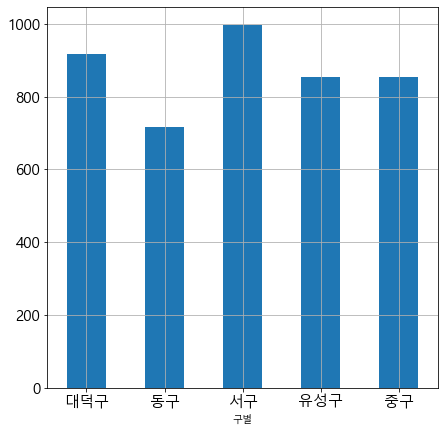

In [78]:
plt.figure()
cctv_pop.iloc[ 0:5, 0 ].plot( kind = 'bar', grid = True, figsize = ( 7, 7 ), rot = 0, fontsize = 15 )

In [103]:
cctv_pop[ '비율' ] = cctv_pop[ '카메라대수' ] / cctv_pop[ '인구수' ] * 100
cctv_pop
cctv_pop_r = cctv_pop.copy()
cctv_pop_r.drop( '합계', inplace = True )
cctv_pop_r

카메라대수     인구수        비율
구별                          
대덕구    916  179402  0.510585
동구     717  229309  0.312679
서구     996  481763  0.206741
유성구    855  349635  0.244541
중구     854  242829  0.351688

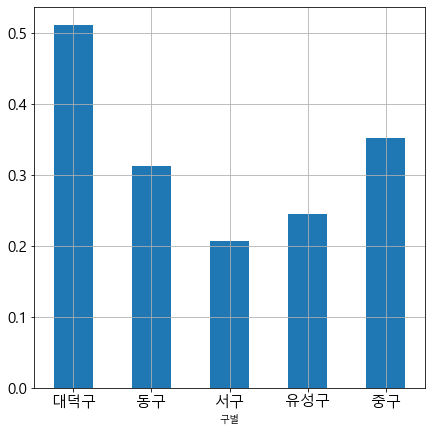

In [82]:
cctv_pop.iloc[ 0:5, 2 ].plot( kind = 'bar', grid = True, figsize = ( 7, 7 ), rot = 0, fontsize = 15 )
plt.show()

In [115]:
fp1 = np.polyfit( cctv_pop_r[ '인구수' ], cctv_pop_r[ '카메라대수' ], 1 )
fp1

array([4.85806807e-04, 7.23515725e+02])

In [119]:
f1 = np.poly1d( fp1 )
fx = np.linspace( 2000, 550000, 100 )

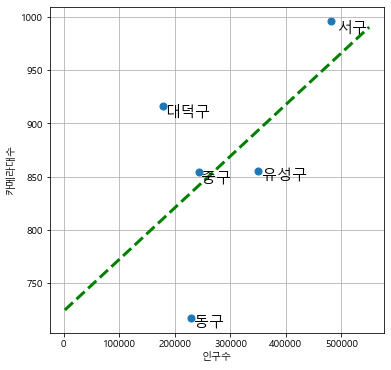

In [120]:
plt.figure( figsize = ( 6, 6 ) )
plt.scatter( cctv_pop_r[ '인구수' ], cctv_pop_r[ '카메라대수' ], s = 50 )
plt.xlabel( '인구수' )
plt.ylabel( '카메라대수' )
plt.grid()
for i in range( 5 ):
    plt.text( cctv_pop_r[ '인구수' ][ i ] * 1.02, cctv_pop_r[ '카메라대수' ][ i ] * 0.99, cctv_pop_r.index[ i ], fontsize = 15 )
plt.plot( fx, f1( fx ), ls = 'dashed', lw = 3, color = 'g' )
plt.show()

* CCTV수는 서구가 가장 많고 다른 구도 비슷한 양상이였지만,
* 인구수 대비 CCTV비율은 대덕구가 가장 높았고
* 오히려 서구나 유성구의 수치가 비교적 낮은 것을 확인할 수 있었다.

* 지역별 적절한 CCTV수 혹은 인구대비 적절한 CCTV수의 기준이 될만한 자료가 부족해서
* 어느 지역이 설치가 부족하고 어느 지역 과잉설치 되어있는지 판단하기는 어렵다.

* 분석 결과를 보아 상대적으로 대덕구가 과잉설치 되어있고,
* 동구, 인구대비로 보았을 때는 서구, 유성구의 CCTV 설치가 더 필요한 것으로 판단된다.

In [ ]:
'''

- 데이터프레임을 대전시 전체로 만들면 한번에 기초통계분석 가능

'''